<a href="https://colab.research.google.com/github/gmrammohan15/EVA4/blob/master/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import sys
sys.path.append('/content/gdrive/My Drive/S9-Assignment/')
!ls /content/gdrive/My\ Drive/S9-Assignment

data		    __init__.py       resnet.py
dataloader.py	    misclassified.py  S8_Assignment.ipynb
data_transforms.py  Models	      Transforms_Albumentations
eval.py		    __pycache__
grad_cam.py	    README.md


In [8]:
%cd /content/gdrive/My Drive/S9-Assignment/

/content/gdrive/My Drive/S9-Assignment


In [4]:
!ls

data		    eval.py	      Models	   resnet.py
dataloader.py	    __init__.py       __pycache__  S8_Assignment.ipynb
data_transforms.py  misclassified.py  README.md    Transforms_Albumentations


In [9]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
!pip install albumentations

     |████████████████████████████████| 634kB 4.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=74462ef4c8434aab095551da7824e2b1659761a37071ef6e82dbf4f81d6603c4
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [10]:
from Transforms_Albumentations import transform

import importlib
importlib.reload(transform)

#from transform  import Data
data = transform.Data()

trainset = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
show_trainloader = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
show_testloader = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


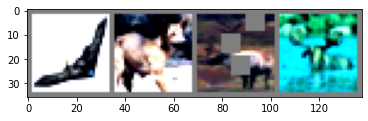

In [11]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(show_trainloader)
pics, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(pics))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
#from models import resnet
from Models import resnet

import torch

import importlib
importlib.reload(resnet)
#importlib.reload(eval)


model = resnet.ResNet18()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
print(model.device)
model = model.to(model.device)
model.summary((3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [10]:

import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import OneCycleLR
from torch.optim.lr_scheduler import StepLR


EPOCHS = 30
l2_loss = 0.0001
l1_lambda = 0
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=l2_loss)

schedular = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.5, steps_per_epoch=len(trainloader), epochs=EPOCHS)


model.evaluate(optimizer, trainloader, testloader, EPOCHS, criterion, schedular, True, l1_lambda)

Epoch= 0 Loss=1.2506529092788696 Batch_id=390 Accuracy=53.75: 100%|██████████| 391/391 [00:38<00:00, 10.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 0, Train Accuracy: 53.75 , Test Accuracy: 54.21


Epoch= 1 Loss=1.1106116771697998 Batch_id=390 Accuracy=66.25: 100%|██████████| 391/391 [00:39<00:00, 10.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1, Train Accuracy: 66.25 , Test Accuracy: 65.93


Epoch= 2 Loss=0.6345151662826538 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2, Train Accuracy: 80.0 , Test Accuracy: 74.76


Epoch= 3 Loss=0.4921247363090515 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3, Train Accuracy: 88.75 , Test Accuracy: 76.87


Epoch= 4 Loss=0.5441305637359619 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [00:38<00:00, 10.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4, Train Accuracy: 83.75 , Test Accuracy: 78.89


Epoch= 5 Loss=0.39891043305397034 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5, Train Accuracy: 87.5 , Test Accuracy: 79.7


Epoch= 6 Loss=0.5441186428070068 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:38<00:00, 10.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6, Train Accuracy: 86.25 , Test Accuracy: 82.46


Epoch= 7 Loss=0.3622872233390808 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:38<00:00, 10.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7, Train Accuracy: 91.25 , Test Accuracy: 82.55


Epoch= 8 Loss=0.4236452579498291 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:38<00:00, 10.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8, Train Accuracy: 86.25 , Test Accuracy: 83.09


Epoch= 9 Loss=0.3306741714477539 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:39<00:00, 10.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9, Train Accuracy: 91.25 , Test Accuracy: 83.8


Epoch= 10 Loss=0.18927574157714844 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10, Train Accuracy: 95.0 , Test Accuracy: 84.14


Epoch= 11 Loss=0.29921334981918335 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:38<00:00, 10.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11, Train Accuracy: 90.0 , Test Accuracy: 84.63


Epoch= 12 Loss=0.3560425043106079 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:39<00:00,  9.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12, Train Accuracy: 93.75 , Test Accuracy: 83.38


Epoch= 13 Loss=0.1829463243484497 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [00:39<00:00,  9.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13, Train Accuracy: 96.25 , Test Accuracy: 84.68


Epoch= 14 Loss=0.093035988509655 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [00:38<00:00, 10.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14, Train Accuracy: 98.75 , Test Accuracy: 85.28


Epoch= 15 Loss=0.10424153506755829 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:38<00:00, 10.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15, Train Accuracy: 100.0 , Test Accuracy: 84.99


Epoch= 16 Loss=0.14324267208576202 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16, Train Accuracy: 98.75 , Test Accuracy: 85.18


Epoch= 17 Loss=0.20604407787322998 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [00:38<00:00, 10.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17, Train Accuracy: 96.25 , Test Accuracy: 85.64


Epoch= 18 Loss=0.14375993609428406 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [00:39<00:00,  9.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18, Train Accuracy: 98.75 , Test Accuracy: 84.7


Epoch= 19 Loss=0.16330473124980927 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:38<00:00, 10.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19, Train Accuracy: 100.0 , Test Accuracy: 84.43


Epoch= 20 Loss=0.03118065558373928 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:39<00:00,  9.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20, Train Accuracy: 100.0 , Test Accuracy: 85.46


Epoch= 21 Loss=0.11157917976379395 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [00:39<00:00,  9.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21, Train Accuracy: 98.75 , Test Accuracy: 85.68


Epoch= 22 Loss=0.0748937651515007 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:39<00:00,  9.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22, Train Accuracy: 100.0 , Test Accuracy: 86.2


Epoch= 23 Loss=0.1011984571814537 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:39<00:00,  9.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23, Train Accuracy: 100.0 , Test Accuracy: 85.37


Epoch= 24 Loss=0.21466414630413055 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [00:38<00:00, 10.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24, Train Accuracy: 97.5 , Test Accuracy: 85.65


Epoch= 25 Loss=0.09616396576166153 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25, Train Accuracy: 98.75 , Test Accuracy: 86.26


Epoch= 26 Loss=0.11441981792449951 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [00:39<00:00,  9.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26, Train Accuracy: 98.75 , Test Accuracy: 85.55


Epoch= 27 Loss=0.03965497761964798 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:39<00:00,  9.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27, Train Accuracy: 100.0 , Test Accuracy: 85.96


Epoch= 28 Loss=0.062064819037914276 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:39<00:00,  9.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28, Train Accuracy: 100.0 , Test Accuracy: 86.68


Epoch= 29 Loss=0.11026914417743683 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:39<00:00,  9.96it/s]
100%|██████████| 79/79 [00:03<00:00, 24.14it/s]

Epoch 29, Train Accuracy: 100.0 , Test Accuracy: 86.56


Files already downloaded and verified
saliency_map size : torch.Size([8, 8])
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


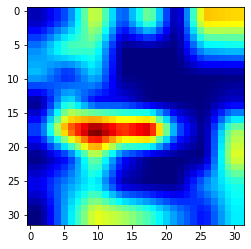

In [67]:
import cv2
import numpy as np
import torch
from torchvision.utils import make_grid
import torch.nn.functional as F

def visualize_cam(mask, img):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask.squeeze()), cv2.COLORMAP_JET)
    heatmap = torch.from_numpy(heatmap).permute(2, 0, 1).float().div(255)
    b, g, r = heatmap.split(1)
    heatmap = torch.cat([r, g, b])
    print(type(heatmap))
    result = heatmap+img
    result = result.div(result.max()).squeeze()
    
    return heatmap, result

testset =  data.getTrainDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)

dataiter = iter(testloader2)
pic, labels = dataiter.next()
#print(model.layer4)
from grad_cam import GradCAM

resnet_dict = dict(type='resnet', arch=model, target_layer=model.layer3, input_size=(32, 32))
gradcam = GradCAM(resnet_dict, True)

mask, _ = gradcam(pic.to(model.device))
mask = mask.cpu()
print(type(mask.numpy()))

pic = torchvision.utils.make_grid(pic)
heatmap, result = visualize_cam(mask.numpy(), pic.numpy())
plt.imshow(np.transpose(heatmap, (1, 2, 0)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


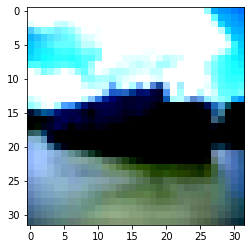

In [66]:
plt.imshow(np.transpose(pic, (1, 2, 0)))

saliency_map size : torch.Size([8, 8])
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


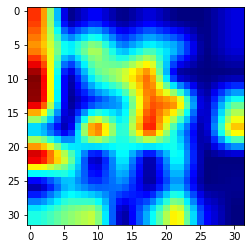

In [68]:
pic, labels = dataiter.next()

#print(model.layer4)
from grad_cam import GradCAM

resnet_dict = dict(type='resnet', arch=model, target_layer=model.layer3, input_size=(32, 32))
gradcam = GradCAM(resnet_dict, True)

mask, _ = gradcam(pic.to(model.device))
mask = mask.cpu()
print(type(mask.numpy()))

pic = torchvision.utils.make_grid(pic)
heatmap, result = visualize_cam(mask.numpy(), pic.numpy())
plt.imshow(np.transpose(heatmap, (1, 2, 0)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


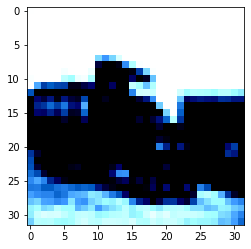

In [69]:
plt.imshow(np.transpose(pic, (1, 2, 0)))

<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


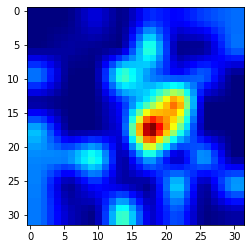

In [72]:
pic, labels = dataiter.next()

mask, _ = gradcam(pic.to(model.device))
mask = mask.cpu()

pic = torchvision.utils.make_grid(pic)
heatmap, result = visualize_cam(mask.numpy(), pic.numpy())
plt.imshow(np.transpose(heatmap, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


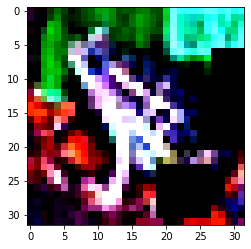

In [73]:
plt.imshow(np.transpose(pic, (1, 2, 0)))

Trying for layer4 of resnet

saliency_map size : torch.Size([4, 4])
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


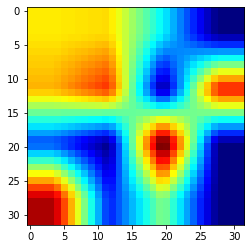

In [74]:
pic, labels = dataiter.next()


resnet_dict = dict(type='resnet', arch=model, target_layer=model.layer4, input_size=(32, 32))
gradcam = GradCAM(resnet_dict, True)

mask, _ = gradcam(pic.to(model.device))
mask = mask.cpu()

pic = torchvision.utils.make_grid(pic)
heatmap, result = visualize_cam(mask.numpy(), pic.numpy())
plt.imshow(np.transpose(heatmap, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


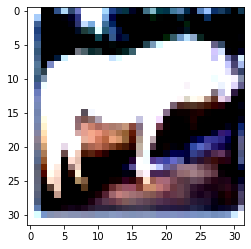

In [75]:
plt.imshow(np.transpose(pic, (1, 2, 0)))

<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


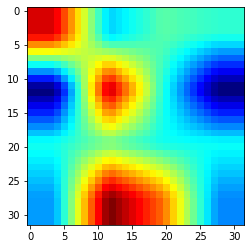

In [76]:
pic, labels = dataiter.next()


# resnet_dict = dict(type='resnet', arch=model, target_layer=model.layer4, input_size=(32, 32))
# gradcam = GradCAM(resnet_dict, True)

mask, _ = gradcam(pic.to(model.device))
mask = mask.cpu()

pic = torchvision.utils.make_grid(pic)
heatmap, result = visualize_cam(mask.numpy(), pic.numpy())
plt.imshow(np.transpose(heatmap, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


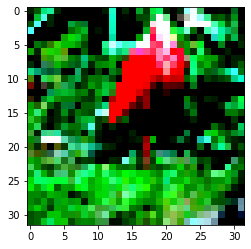

In [77]:
plt.imshow(np.transpose(pic, (1, 2, 0)))

<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


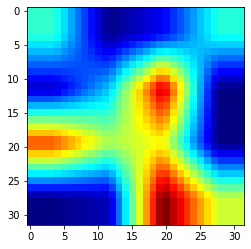

In [78]:
pic, labels = dataiter.next()


# resnet_dict = dict(type='resnet', arch=model, target_layer=model.layer4, input_size=(32, 32))
# gradcam = GradCAM(resnet_dict, True)

mask, _ = gradcam(pic.to(model.device))
mask = mask.cpu()

pic = torchvision.utils.make_grid(pic)
heatmap, result = visualize_cam(mask.numpy(), pic.numpy())
plt.imshow(np.transpose(heatmap, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


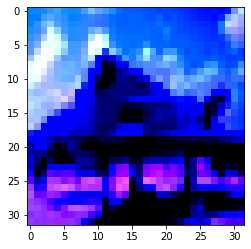

In [79]:
plt.imshow(np.transpose(pic, (1, 2, 0)))